# Vertex AI Foundation Models and Generative AI APIs Walkthrough




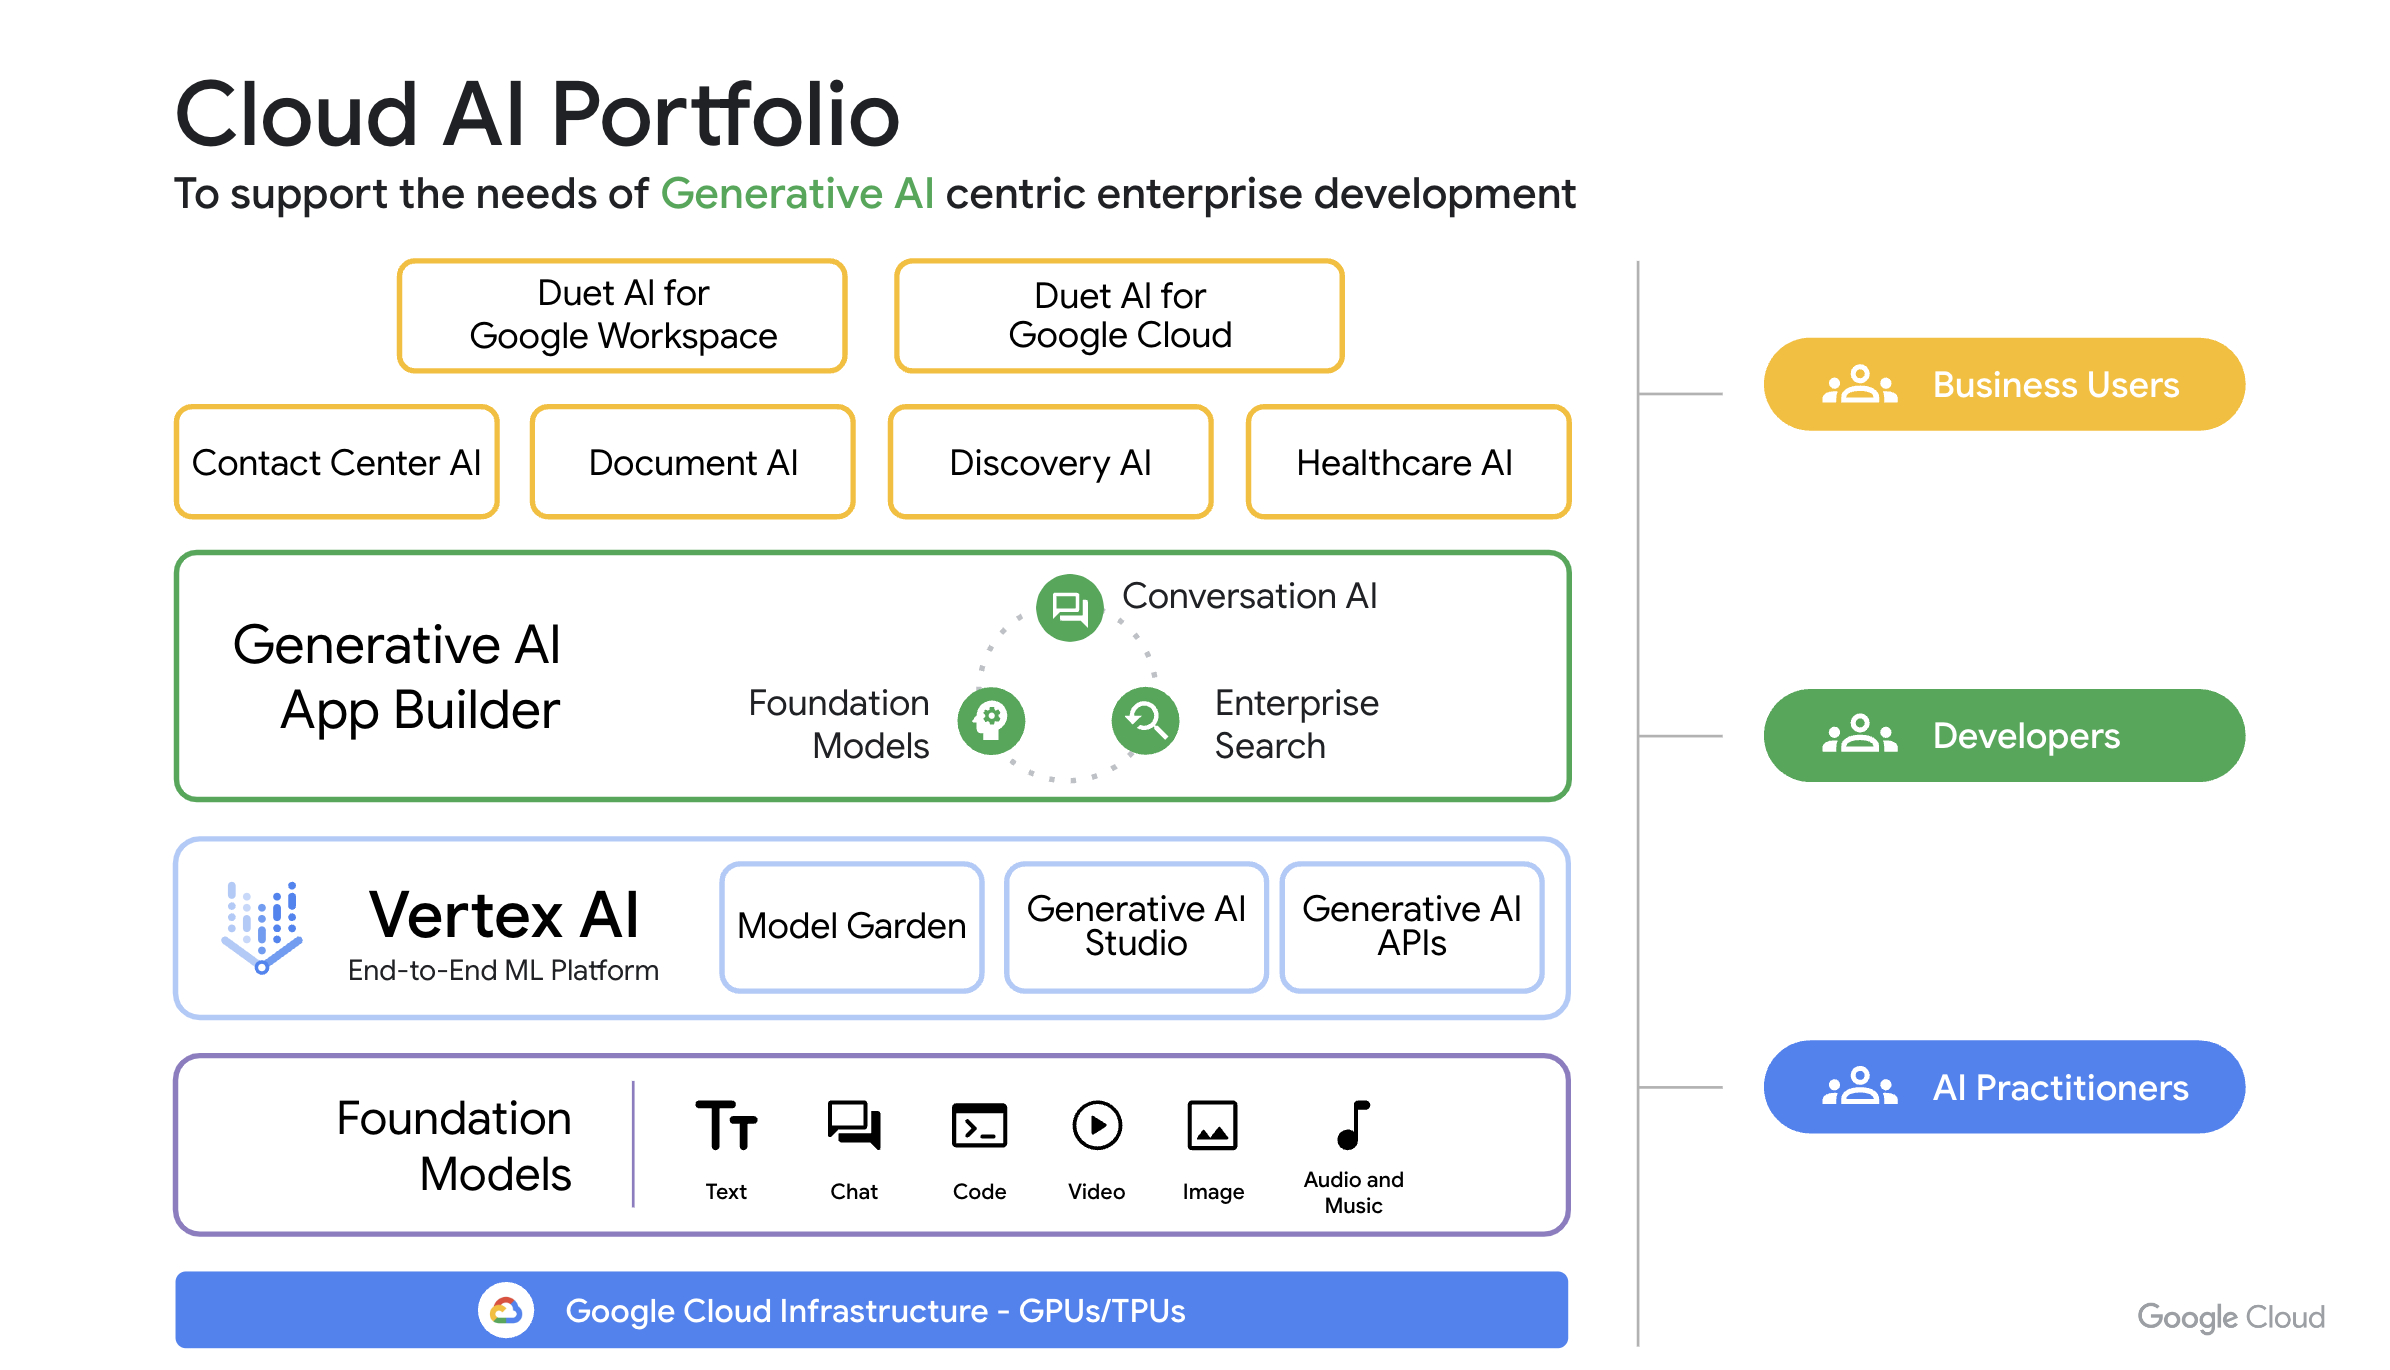

## Vertex AI foundation models
### PaLM API offerings

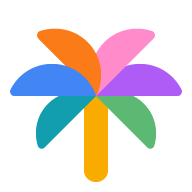

The Vertex AI PaLM API contains the publisher endpoints for Google's Pathways Language Model 2 (PaLM 2), which are large language models (LLMs) that generate text and code in response to natural language prompts.


*  **PaLM API for text** is fine-tuned for language tasks such as classification, summarization, and entity extraction.

*  **PaLM API for chat** is fine-tuned for multi-turn chat, where the model keeps track of previous messages in the chat and uses it as context for generating new responses.

### Other Generative APIs

* **Codey APIs** include three models that generate code, suggest code for code completion, and let developers chat to get help with code-related questions. For more information, see Code models overview.

* **Text Embedding API** generates vector embeddings for input text. You can use embeddings for tasks like semantic search, recommendation, classification, and outlier detection.

* **Multimodal embeddings** generates embedding vectors based on image and text inputs. These embeddings can later be used for other subsequent tasks like image classification or content recommendations. For more information, see the multimodal embeddings page.

* **Imagen** is a text-to-image foundation model, that lets organizations generate and customize studio-grade images at scale for any business need.


### Model naming scheme

Foundation model names have two components: use case and model size. The naming convention is in the format `<use case>-<model size>`. For example, text-bison represents the Bison text model.

The model sizes are:

* **Bison**: Best value in terms of capability and cost.
* **Gecko**: Smallest and lowest cost model for simple tasks.

You can use the stable or the latest version of a model.

### Model versioning and lifecycle

Each Vertex AI Generative AI model is available in a stable version and a latest version. The versions differ by whether they change over time or not and by how long they're available.

A stable version of a model does not change and is available for six months after the release date of its subsequent version. For example, `text-bison@001` is available for six months after the release date of `text-bison@002`.




## Set up the environment

### Install Vertex SDK

In [ ]:
!pip install google-cloud-aiplatform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.0/321.0 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.1
    Uninstalling shapely-2.0.1:
      Successfully uninstalled shapely-2.0.1


### Authenticate

If running in [Google Colab](https://colab.google/) authenticate with `google.colab.google.auth` otherwise follow one of the [supported methods](https://cloud.google.com/docs/authentication/application-default-credentials) to make sure that you Application Default Credentials are properly set.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth as google_auth

    google_auth.authenticate_user()

### Initialize Vertex SDK

In [ ]:
import vertexai

PROJECT_ID = 'jk-mlops-dev'
LOCATION = 'us-central1'

vertexai.init(project=PROJECT_ID, location=LOCATION)

## Text and Chat Models

### **text-bison** model

Fine-tuned to follow natural language instructions and is suitable for a variety of language tasks, such as:
* Classification
* Sentiment Analysis
* Entity extraction
* Extractive Question Answering
* Summarization
* Re-writing text in a different style
* Ad copy generation
* Concept ideation

#### Stable version
**text-bison@001**

#### Model properties

* Max input token: 8192
* Max output tokens: 1024
* Training data: Up to Feb 2023

#### REST API

##### HTTP request
`POST https://us-central1-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/us-central1/publishers/google/models/text-bison:predict`

##### Request body
```
{
  "instances": [
    {
      "prompt": string
    }
  ],
  "parameters": {
    "temperature": number,
    "maxOutputTokens": integer,
    "topP": number,
    "topK": integer
  }
}
```

##### Request response

```
{
  "predictions": [
    {
      "content": string,
      "citationMetadata": {
        "citations": [
          {
            "startIndex": integer,
            "endIndex": integer,
            "url": string,
            "title": string,
            "license": string,
            "publicationDate": string
          }
        ]
      },
      "safetyAttributes": {
        "categories": [ string ],
        "blocked": boolean,
        "scores": [ numeric ]
      }
    }
  ]
}
```

Refer to the [API reference](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/text) for the detailed information.

#### Using Python SDK


Create the model.

In [ ]:
from vertexai.language_models import TextGenerationModel

model = TextGenerationModel.from_pretrained('text-bison@001')

Submit a prompt.

In [ ]:
prompt = """
Extract the technical specifications from the text below in a JSON format. Valid fields are name, network, ram, processor, storage, and color.
Text: Google Pixel 7, 5G network, 8GB RAM, Tensor G2 processor, 128GB of storage, Lemongrass
JSON:
"""

parameters = {
    'temperature': 0.0, # default 0
    'max_output_tokens': 256, # default 128
    'top_p': 0.8, # default 0.95
    'top_k': 40 # default 40
}

response = model.predict(
    prompt=prompt,
    **parameters
)

The response is a `TextGenerationResponse` object.

In [ ]:
print(type(response))

<class 'vertexai.language_models._language_models.TextGenerationResponse'>


Display the properties of the response object.

In [ ]:
dir(response)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_prediction_response',
 'is_blocked',
 'raw_prediction_response',
 'safety_attributes',
 'text']

Display the generated text.

In [ ]:
print(response.text)

{
  "name": "Google Pixel 7",
  "network": "5G",
  "ram": "8GB",
  "processor": "Tensor G2",
  "storage": "128GB",
  "color": "Lemongrass"
}


 Display the safety attributes.

In [ ]:
print(response.safety_attributes)

{}


Let's try a few shot prompt for a Q&A task.

In [ ]:
prompt = """Background: There is evidence that there have been significant changes \
in Amazon rainforest vegetation over the last 21,000 years through the Last \
Glacial Maximum (LGM) and subsequent deglaciation. Analyses of sediment \
deposits from Amazon basin paleo lakes and from the Amazon Fan indicate that \
rainfall in the basin during the LGM was lower than for the present, and this \
was almost certainly associated with reduced moist tropical vegetation cover \
in the basin. There is debate, however, over how extensive this reduction \
was. Some scientists argue that the rainforest was reduced to small, isolated \
refugia separated by open forest and grassland; other scientists argue that \
the rainforest remained largely intact but extended less far to the north, \
south, and east than is seen today. This debate has proved difficult to \
resolve because the practical limitations of working in the rainforest mean \
that data sampling is biased away from the center of the Amazon basin, and \
both explanations are reasonably well supported by the available data.

Q: What does LGM stands for?
A: Last Glacial Maximum.

Q: What did the analysis from the sediment deposits indicate?
A: Rainfall in the basin during the LGM was lower than for the present.

Q: What are some of scientists arguments?
A: The rainforest was reduced to small, isolated refugia separated by open forest and grassland.

Q: There have been major changes in Amazon rainforest vegetation over the last how many years?
A: 21,000.

Q: What caused changes in the Amazon rainforest vegetation?
A: The Last Glacial Maximum (LGM) and subsequent deglaciation

Q: What has been analyzed to compare Amazon rainfall in the past and present?
A: Sediment deposits.

Q: What has the lower rainfall in the Amazon during the LGM been attributed to?
A:"""

parameters = {
    'temperature': 0.1, # default 0
    'max_output_tokens': 256, # default 128
    'top_p': 0.8, # default 0.95
    'top_k': 40 # default 40
}


response = model.predict(
    prompt=prompt,
    **parameters
)

In [ ]:
print(response.text)

Reduced moist tropical vegetation cover in the basin.


In [ ]:
print(response.safety_attributes)

{'Death, Harm & Tragedy': 0.1}


Let's try a generative creation prompt.

In [ ]:
prompt = """
Quote some Shakespear.
"""

parameters = {
    'temperature': 0.2, # default 0
    'max_output_tokens': 256, # default 128
    'top_p': 0.8, # default 0.95
    'top_k': 40 # default 40
}


response = model.predict(
    prompt=prompt,
    **parameters
)

In [ ]:
print(response.text)

* * *

All the world's a stage,
And all the men and women merely players.
They have their exits and their entrances,
And one man in his time plays many parts,
His acts being seven ages.

At first the infant,
Mewling and puking in the nurse's arms.
And then the whining schoolboy,
With his satchel and his shining morning face,
Creeping like snail unwillingly to school.

And then the lover,
Sighing like furnace, with a woeful ballad
Made to his mistress' eyebrow.

Then a soldier,
Full of strange oaths and bearded like the pard,
Jealous in honour, sudden and quick in quarrel,
Seeking the bubble reputation
Even in the cannon's mouth.

And then the justice,
In fair round belly with good capon lined,
With eyes severe and beard of formal cut,
Full of wise saws and modern instances;
And so he plays his part.

The sixth age shifts into the lean and slippered pantaloon,
With spectacles on nose and pouch on side;
His youthful hose, well saved, a world too wide


In [ ]:
print(response.safety_attributes)

{}


In [ ]:
print(response._prediction_response.predictions[0]['citationMetadata'])

{'citations': [{'endIndex': 148.0, 'title': 'An American Selection of Lessons in Reading and Speaking', 'startIndex': 11.0, 'publicationDate': '1793'}, {'title': 'Nicholas Rowe', 'publicationDate': '1718', 'endIndex': 272.0, 'startIndex': 65.0}, {'startIndex': 152.0, 'publicationDate': '1811', 'endIndex': 299.0, 'title': 'Lessons in Elocution, Or, A Selection of Pieces, in Prose and Verse, for the Improvement of Youth in Reading and Speaking'}, {'startIndex': 220.0, 'endIndex': 353.0}, {'endIndex': 422.0, 'startIndex': 252.0}, {'endIndex': 426.0, 'startIndex': 301.0}, {'startIndex': 305.0, 'endIndex': 451.0, 'publicationDate': '1718', 'title': 'Nicholas Rowe'}, {'publicationDate': '1796', 'title': 'A Catalogue of the Pictures', 'endIndex': 461.0, 'startIndex': 336.0}, {'startIndex': 341.0, 'publicationDate': '1778', 'endIndex': 490.0, 'title': 'The New London Spelling-book'}, {'title': 'A Catalogue of the Pictures', 'publicationDate': '1796', 'endIndex': 582.0, 'startIndex': 371.0}, {'

### **chat-bison** model

This chat model is fine-tuned to conduct natural multi-turn conversations, and is ideal for text tasks  that require back-and-forth interactions.

#### Stable version

**chat-bision@001**

#### Model properties

* Max input token: 4096
* Max output tokens: 1024
* Training data: Up to Feb 2023
* Max turns: 2500

#### REST API

##### HTTP request
`POST https://us-central1-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/us-central1/publishers/google/models/chat-bison:predict`

##### Request body
```
{
  "instances": [
    {
      "context":  string,
      "examples": [
        {
          "input": { "content": string },
          "output": { "content": string }
        }
      ],
      "messages": [
        {
          "author": string,
          "content": string,
        }
      ],
    }
  ],
  "parameters": {
    "temperature": number,
    "maxOutputTokens": integer,
    "topP": number,
    "topK": integer
  }
}
```

##### Request response

```
{
  "predictions": [
    {
      "candidates": [
        {
          "author": string,
          "content": string
        }
      ],
      "citationMetadata": {
        "citations": [
          {
            "startIndex": integer,
            "endIndex": integer,
            "url": string,
            "title": string,
            "license": string,
            "publicationDate": string
          }
        ]
      },
      
      "safetyAttributes": [
        {
          "categories": [],
          "blocked": false,
          "scores": []
        }
      ],
    }
  ]
}
```

Refer to the [API reference](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/text-chat) for the detailed information.

#### Using Python SDK

Create the model.

In [ ]:
from vertexai.language_models import ChatModel, InputOutputTextPair

chat_model = ChatModel.from_pretrained("chat-bison-32k")

Start chat.

In [ ]:
parameters = {
    'temperature': 0.2, # default 0
    'max_output_tokens': 256, # default 128
    'top_p': 0.95, # default 0.95
    'top_k': 40 # default 40
}

context = """
My name is Miles. You are an astronomer, knowledgeable about the solar system.
"""

examples = [
    InputOutputTextPair(
        input_text="How many moons does Mars have?",
        output_text="The planet Mars has two moons, Phobos and Deimos.",
    ),
]

chat = chat_model.start_chat(
    context=context,
    examples=examples
)

The `start_chat` method returns a `ChatSession` object that encapsulates state history management between turns.

In [ ]:
print(type(chat))

<class 'vertexai.language_models._language_models.ChatSession'>


Send the first message.

In [ ]:
response = chat.send_message(
        "How many planets are there in the solar system?", **parameters
    )

The response is a `TextGenerationResponse` object.

In [ ]:
print(type(response))

<class 'vertexai.language_models._language_models.TextGenerationResponse'>


In [ ]:
print(response.text)

There are eight planets in the solar system: Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune.


In [ ]:
print(response.safety_attributes)

{}


Sent another message.


In [ ]:
response = chat.send_message(
        "Which one is the biggest?", **parameters
    )

In [ ]:
print(response.text)

Jupiter is the biggest planet in the solar system.


In [ ]:
print(chat.message_history)

[ChatMessage(content='How many planets are there in the solar system?', author='user'), ChatMessage(content='There are eight planets in the solar system: Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune.', author='bot'), ChatMessage(content='Which one is the biggest?', author='user'), ChatMessage(content='Jupiter is the biggest planet in the solar system.', author='bot')]


In [ ]:
print(chat._context)


My name is Miles. You are an astronomer, knowledgeable about the solar system.



In [ ]:
print(chat._examples)

[InputOutputTextPair(input_text='How many moons does Mars have?', output_text='The planet Mars has two moons, Phobos and Deimos.')]


In [ ]:
print(response._prediction_response)

Prediction(predictions=[{'candidates': [{'author': 'bot', 'content': 'Jupiter is the biggest planet in the solar system.'}], 'citationMetadata': [{'citations': []}], 'safetyAttributes': [{'blocked': False, 'scores': [0.1], 'categories': ['Religion & Belief']}]}], deployed_model_id='', model_version_id='', model_resource_name='', explanations=None)


## Text Embeddings

### **textembedding-gecko** model

Returns model embeddings for text inputs.

#### Stable version

**textembedding-gecko@001**

#### Model properties

* Max input token: 3072
* Output: 768-dimensional vector


#### REST API

##### HTTP request
`POST https://us-central1-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/us-central1/publishers/google/models/textembedding-gecko:predict`

##### Request body
```
{
  "instances": [
    { "content": string }
  ]
}
```

##### Request response

```
{
  "predictions": [
    {
      "embeddings": {
        "statistics": {
          "truncated": boolean,
          "tokenCount": integer
        },
        "values": [ number ]
      }
    }
  ]
}
```

Refer to the [API reference](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/text-embeddings) for the detailed information.

#### Using Python SDK

Create the model.

In [ ]:
from vertexai.language_models import TextEmbeddingModel

embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")

Generate embeddings.

In [ ]:
embeddings = embedding_model.get_embeddings(texts=["What is life?"])

print(type(embeddings))

<class 'list'>


In [ ]:
print(type(embeddings[0]))

<class 'vertexai.language_models._language_models.TextEmbedding'>


In [ ]:
dir(embeddings[0])

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_prediction_response',
 'statistics',
 'values']

In [ ]:
for embedding in embeddings:
    vector = embedding.values
    print(f"Length = {len(vector)}")
    print(vector[0:10])

Length = 768
[0.010562753304839134, 0.04915031045675278, -0.022224493324756622, 0.0208794716745615, 0.024389723315835, 0.010366306640207767, 0.023919280618429184, 0.022391626611351967, -0.031569067388772964, 0.023535897955298424]


In [ ]:
print(embeddings[0]._prediction_response)

Prediction(predictions=[{'embeddings': {'values': [0.010562753304839134, 0.04915031045675278, -0.022224493324756622, 0.0208794716745615, 0.024389723315835, 0.010366306640207767, 0.023919280618429184, 0.022391626611351967, -0.031569067388772964, 0.023535897955298424, -0.017047161236405373, -0.014345862902700901, 0.044956106692552567, 0.027327297255396843, -0.03314697742462158, -0.028214626014232635, -0.035373710095882416, -0.05229683220386505, 0.017105583101511, -0.03780610114336014, -0.07891207933425903, -0.01173518318682909, -0.01629730500280857, -0.04353305324912071, 0.013023999519646168, -0.10904901474714279, -0.0341256819665432, -0.0025329082272946835, -0.036971937865018845, -0.027775181457400322, 0.02332289144396782, 0.0052000475116074085, 0.005503748077899218, 0.0047489493153989315, -0.029920609667897224, 0.07563772797584534, 0.0007565636187791824, 0.03501711040735245, 0.02154686115682125, -0.000812096637673676, 0.06169590726494789, -0.024313345551490784, 0.03736764192581177, -0.

#### Comparing similarity of sentences using cosine similarity.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


text = [
    "i really enjoyed the movie last night",
    "so many amazing cinematic scenes yesterday",
    "had a great time writing my Python scripts a few days ago",
    "huge sense of relief when my .py script finally ran without error",
    "O Romeo, Romeo, wherefore art thou Romeo?",
]

df = pd.DataFrame(text, columns=["text"])
df

text
0              i really enjoyed the movie last night
1         so many amazing cinematic scenes yesterday
2  had a great time writing my Python scripts a f...
3  huge sense of relief when my .py script finall...
4          O Romeo, Romeo, wherefore art thou Romeo?

Generate embeddings for the sentences.

In [ ]:
df["embeddings"] = [
    emb.values for emb in embedding_model.get_embeddings(df.text.values)
]
df

text  \
0              i really enjoyed the movie last night   
1         so many amazing cinematic scenes yesterday   
2  had a great time writing my Python scripts a f...   
3  huge sense of relief when my .py script finall...   
4          O Romeo, Romeo, wherefore art thou Romeo?   

                                          embeddings  
0  [-0.01542604435235262, 0.010494514368474483, 0...  
1  [-0.0445345863699913, 0.03854769468307495, -0....  
2  [-0.002230646787211299, -0.00943742785602808, ...  
3  [-0.0167002584785223, 0.00996268168091774, 0.0...  
4  [0.04244288057088852, -0.028772803023457527, 0...

Generate similarity scores.

In [ ]:
cos_sim_array = cosine_similarity(list(df.embeddings.values))

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=text, columns=text)
df

i really enjoyed the movie last night  \
i really enjoyed the movie last night                                            1.000000   
so many amazing cinematic scenes yesterday                                       0.719837   
had a great time writing my Python scripts a fe...                               0.631101   
huge sense of relief when my .py script finally...                               0.552196   
O Romeo, Romeo, wherefore art thou Romeo?                                        0.459453   

                                                    so many amazing cinematic scenes yesterday  \
i really enjoyed the movie last night                                                 0.719837   
so many amazing cinematic scenes yesterday                                            1.000000   
had a great time writing my Python scripts a fe...                                    0.622367   
huge sense of relief when my .py script finally...                                    0.564557   
O Romeo, Romeo, wherefore art thou Romeo?                                             0.524301   

                                                    had a great time writing my Python scripts a few days ago  \
i really enjoyed the movie last night                                                        0.631101           
so many amazing cinematic scenes yesterday                                                   0.622367           
had a great time writing my Python scripts a fe...                                           1.000000           
huge sense of relief when my .py script finally...                                           0.739008           
O Romeo, Romeo, wherefore art thou Romeo?                                                    0.449453           

                                                    huge sense of relief when my .py script finally ran without error  \
i really enjoyed the movie last night                                                        0.552196                   
so many amazing cinematic scenes yesterday                                                   0.564557                   
had a great time writing my Python scripts a fe...                                           0.739008                   
huge sense of relief when my .py script finally...                                           1.000000                   
O Romeo, Romeo, wherefore art thou Romeo?                                                    0.436083                   

                                                    O Romeo, Romeo, wherefore art thou Romeo?  
i really enjoyed the movie last night                                                0.459453  
so many amazing cinematic scenes yesterday                                           0.524301  
had a great time writing my Python scripts a fe...                                   0.449453  
huge sense of relief when my .py script finally...                                   0.436083  
O Romeo, Romeo, wherefore art thou Romeo?                                            1.000000

[Text(0.5, 1, 'i really enjoyed the movie last night'),
 Text(1.5, 1, 'so many amazing cinematic scenes yesterday'),
 Text(2.5, 1, 'had a great time writing my Python scripts a few days ago'),
 Text(3.5, 1, 'huge sense of relief when my .py script finally ran without error'),
 Text(4.5, 1, 'O Romeo, Romeo, wherefore art thou Romeo?')]

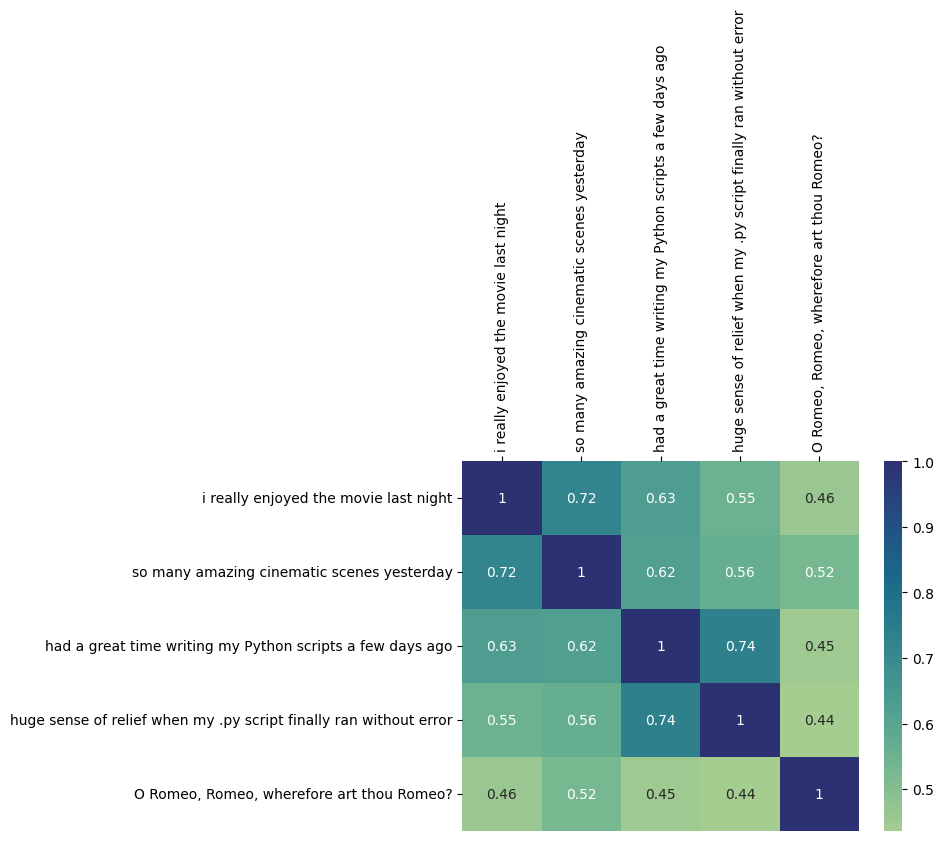

In [ ]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(text, rotation=90)

## Multimodal Embeddings
### **multimodalembedding** model

The Multimodal embeddings model generates 1408-dimension vectors based on the input you provide, which can include a combination of image data and/or text data. The embedding vectors can then be used for subsequent tasks like image classification or content moderation.

The image embedding vector and text embedding vector are in the same semantic space with the same dimensionality. Consequently, these vectors can be used interchangeably for use cases like searching image by text, or searching text by image.

#### Stable version

multimodalembedding@001

#### Model properties

* Max input token: 32
* Max image size: 20MB. The model resizes images to 512 x 512.
* Output: 1408-dimensional vector


#### REST API

##### HTTP request
`POST https://us-central1-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/us-central1/publishers/google/models/multimodalembedding:predict`

##### Request body
```
{
  "instances": [
    {
        "text": string,
        "image": {"bytesBase64Encoded": string}
  ]
}
```

##### Request response

```
{
  "predictions": [
    {
      "textEmbedding": [ number ],
      "imageEmbedding": [ number ]
      
    }
  ]
}
```

Refer to the [API reference](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/multimodal-embeddings) for the detailed information.

#### Using Python SDK

Create the model.

In [ ]:
from vertexai.preview.vision_models import Image, MultiModalEmbeddingModel

embedding_model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding@001")

Load and display images.

In [ ]:
!gsutil cp gs://jk-workshop-files/images/car.png  .
!gsutil cp gs://jk-workshop-files/images/bike.png .
!gsutil cp gs://jk-workshop-files/images/dog.png .

Copying gs://jk-workshop-files/images/car.png...
/ [1 files][104.5 KiB/104.5 KiB]                                                
Operation completed over 1 objects/104.5 KiB.                                    
Copying gs://jk-workshop-files/images/bike.png...
/ [1 files][192.9 KiB/192.9 KiB]                                                
Operation completed over 1 objects/192.9 KiB.                                    
Copying gs://jk-workshop-files/images/dog.png...
/ [1 files][144.5 KiB/144.5 KiB]                                                
Operation completed over 1 objects/144.5 KiB.                                    


In [ ]:
import pathlib

image_names = ['car', 'bike', 'dog']
image_files = ['car.png', 'bike.png', 'dog.png']
images = []

for image_name, file_name in zip(image_names, image_files):
    image = Image(pathlib.Path(file_name).read_bytes())
    images.append(image)
    image.show()


Embedd images.

In [ ]:
image_embeddings = []

for image_name, image in zip(image_names, images):
    print(f'Generating embedding for {image_name}')
    embeddings = embedding_model.get_embeddings(
        image=image)
    image_embeddings.append(embeddings.image_embedding)


Generating embedding for car
Generating embedding for bike
Generating embedding for dog


Visualize similarity.

In [ ]:
cos_sim_array = cosine_similarity(image_embeddings)

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=image_names, columns=image_names)
df

car      bike       dog
car   1.000000  0.588226  0.416770
bike  0.588226  1.000000  0.440645
dog   0.416770  0.440645  1.000000

Create a text embedding.

In [ ]:
text = 'A German Sheppard'

text_embedding = embedding_model.get_embeddings(
        contextual_text=text).text_embedding

In [ ]:
embeddings = image_embeddings + [text_embedding]
embedding_names = image_names + [text]

cos_sim_array = cosine_similarity(embeddings)

df = pd.DataFrame(cos_sim_array, index=embedding_names , columns=embedding_names)
df

car      bike       dog  A German Sheppard
car                1.000000  0.588226  0.416770           0.015431
bike               0.588226  1.000000  0.440645           0.015478
dog                0.416770  0.440645  1.000000           0.169016
A German Sheppard  0.015431  0.015478  0.169016           1.000000

## Image Models

### **imagetext** model

The **imagetext** model supports visual captioning and visual question answering (VQA) scenarios.

Visual captioning lets you generate a relevant description for an image. Visual Question Answering (VQA) lets you provide an image to the model and ask a question about the image's contents. In response to your question you get one or more natural language answers.

#### Stable version

imagetext@001

#### Model properties
TBD

#### REST API

##### HTTP request
`POST https://us-central1-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/us-central1/publishers/google/models/imagetext:predict`

##### Request body - image captioning
```
{
  "instances": [
    {
      "image": {
          "bytesBase64Encoded": "B64_IMAGE"
      }
    }
  ],
  "parameters": {
    "sampleCount": RESPONSE_COUNT,
    "language": "LANGUAGE_CODE"
  }
}
```

##### Request response -image captioning

```
{
  "predictions": [
    "CAPTION1",
    "CAPTION2"
  ],
}
```

##### Request body - VQA
```
{
  "instances": [
    {
      "prompt": "VQA_PROMPT",
      "image": {
          "bytesBase64Encoded": "B64_IMAGE"
      }
    }
  ],
  "parameters": {
    "sampleCount": RESPONSE_COUNT
  }
}
```

##### Request response - VQA

```
{
  "predictions": [
    "ANSWER1",
    "ANSWER2"
  ],
}
```

Refer to the [API reference](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/image-captioning) for the detailed information.

#### Using Python SDK

##### Image captioning


Create the model.

In [ ]:
from vertexai.preview.vision_models import Image, ImageCaptioningModel

model = ImageCaptioningModel.from_pretrained("imagetext@001")

Get and display the image.

In [ ]:
image_filename = 'vcap-vqa-quickstart_fish.jpg'

!gsutil cp gs://cloud-samples-data/generative-ai/image/{image_filename} .

image = Image.load_from_file(image_filename)
image.show()

Generate captions.

In [ ]:
captions = model.get_captions(
    image=image,
    number_of_results=3,
    language='en'
)

The method returns a list of captions.

In [ ]:
print(captions)

['a blue and red fish is swimming next to a white fish', 'a blue and red fish swimming next to each other on a black background', 'a blue and red fish swimming next to each other']


##### Visual Q&A

Create the model.

In [ ]:
from vertexai.preview.vision_models import Image, ImageQnAModel

model = ImageQnAModel.from_pretrained("imagetext@001")

Submit a question.

In [ ]:
question = 'What color is the left fish?'

answers = model.ask_question(
    image=image,
    question=question,
    # Optional:
    number_of_results=2,
)
print(answers)

['blue', 'blue white red']


### **imagegeneration** model

The **imagegenration** model supports generation of new images from text prompts and editing of existing images.

#### Stable version

imagegeneration@001

#### Model properties
* API calls per minute 10
* Maximum number of images returned per request 8
* Maximum image size 10 MB
* Supported returned image resolution 1024 x 1024

For image editing, Imagen maintains the input image aspect ratio. The longest side is changed to be 1024 pixels, and the other side is scaled accordingly.

#### REST API

##### HTTP request
`POST https://us-central1-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/us-central1/publishers/google/models/imagegeneration:predict`

##### Request body - generation
```
{
  "instances": [
    {
      "prompt": "TEXT_PROMPT",
    }
  ],
  "parameters": {
    "sampleCount": IMAGE_COUNT
  }
}
```

##### Request response - generation

```
{
  "predictions": [
    {
      "bytesBase64Encoded": "BASE64_IMG_BYTES",
      "mimeType": "image/png"
    },
    {
      "mimeType": "image/png",
      "bytesBase64Encoded": "BASE64_IMG_BYTES"
    }
  ]
}
```

##### Request body - editing
```
{
  "instances": [
    {
      "prompt": "TEXT_PROMPT",
      "image": {
        "bytesBase64Encoded": "B64_BASE_IMAGE"
      },
      "mask": {
        "image": {
          "bytesBase64Encoded": "B64_MASK_IMAGE"
        }
      }
    }
  ],
  "parameters": {
    "sampleCount": EDIT_IMAGE_COUNT,
    "mode": MODE,
    "sampleImageSize": "IMAGE_SIZE",
    "negativePrompt": "NEGATIVE_PROMPT",
    "seed": SEED_NUMBER,
    "guidanceScale": SCALE_VALUE
  }
}
```

Refer to the [API reference](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/image-generation) for the detailed information.



#### Using Python SDK

Currently, there is no SDK support.

##### Generating an image

In [ ]:
import json

request = {
      "instances": [
    {
      "prompt": "A photo of a city with skyscrapers from the inside of a car with motion blur",
    }
  ],
  "parameters": {
    "sampleCount": 2
  }
}

with open('request.json','w') as f:
    json.dump(request, f)


In [ ]:
!curl -X POST \
    -H "Authorization: Bearer $(gcloud auth print-access-token)" \
    -H "Content-Type: application/json; charset=utf-8" \
    -d @request.json \
    "https://us-central1-aiplatform.googleapis.com/v1/projects/jk-mlops-dev/locations/us-central1/publishers/google/models/imagegeneration:predict" > response.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  240k    0  240k  100   141  64710     37  0:00:03  0:00:03 --:--:-- 64755


In [ ]:
with open('response.json', 'r') as f:
    response = json.load(f)

print(len(response['predictions']))

2


Decode and display the images.

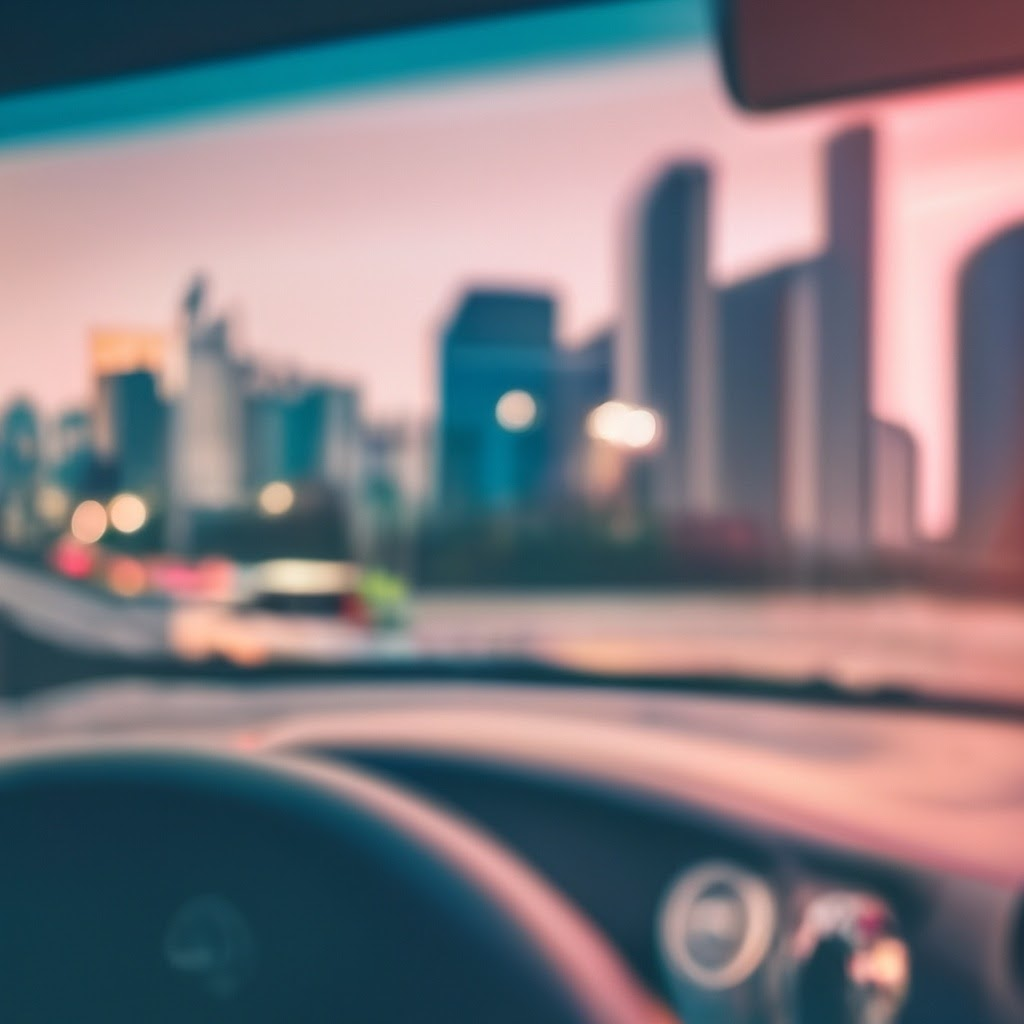

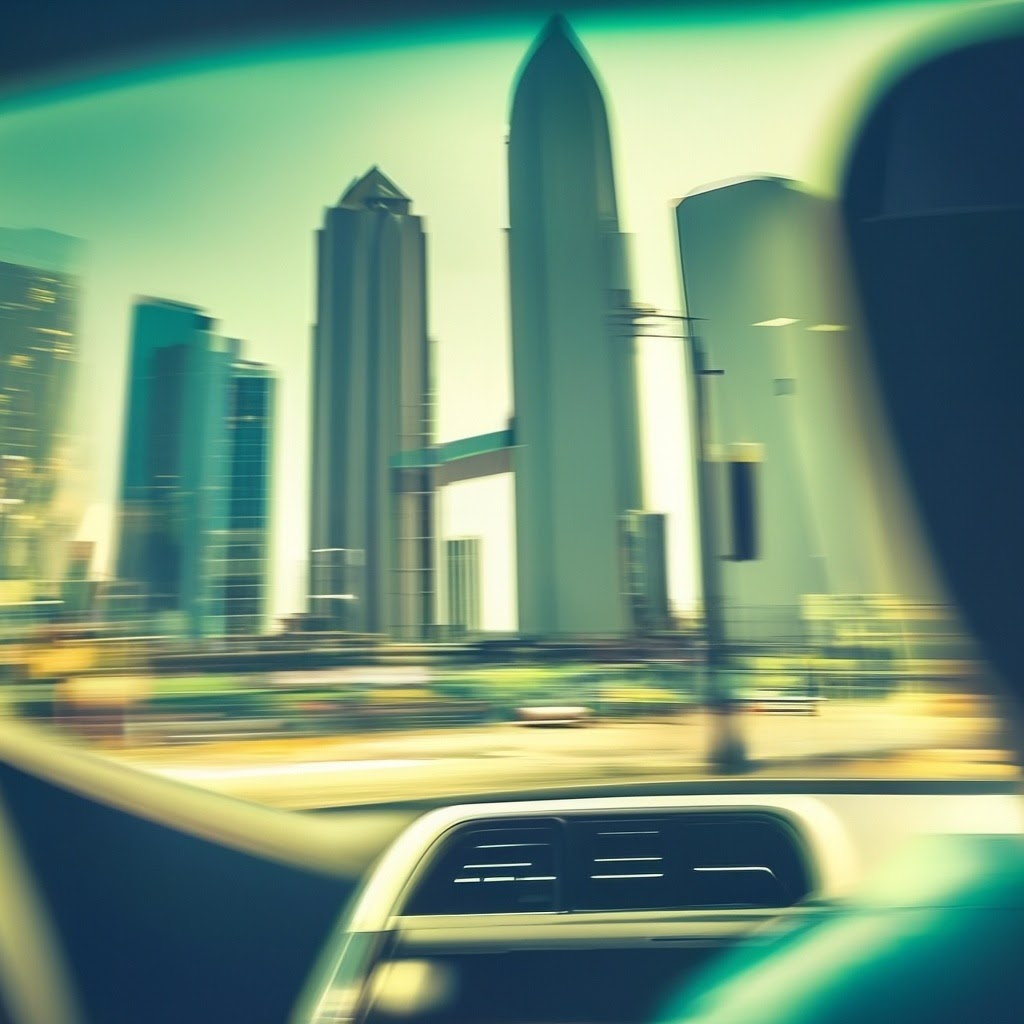

In [ ]:
import base64
from vertexai.preview.vision_models import Image

for prediction in response['predictions']:
    encoded_image = prediction['bytesBase64Encoded']
    image_bytes = base64.b64decode(encoded_image)
    image = Image(image_bytes)
    image.show()

A prompt using a lens specification.

In [ ]:
request = {
      "instances": [
    {
      "prompt": "A photo of a red leaf, 35mm lens",
    }
  ],
  "parameters": {
    "sampleCount": 1
  }
}

with open('request.json','w') as f:
    json.dump(request, f)

In [ ]:
!curl -X POST \
    -H "Authorization: Bearer $(gcloud auth print-access-token)" \
    -H "Content-Type: application/json; charset=utf-8" \
    -d @request.json \
    "https://us-central1-aiplatform.googleapis.com/v1/projects/jk-mlops-dev/locations/us-central1/publishers/google/models/imagegeneration:predict" > response.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  251k    0  251k  100    97  68575     25  0:00:03  0:00:03 --:--:-- 68590


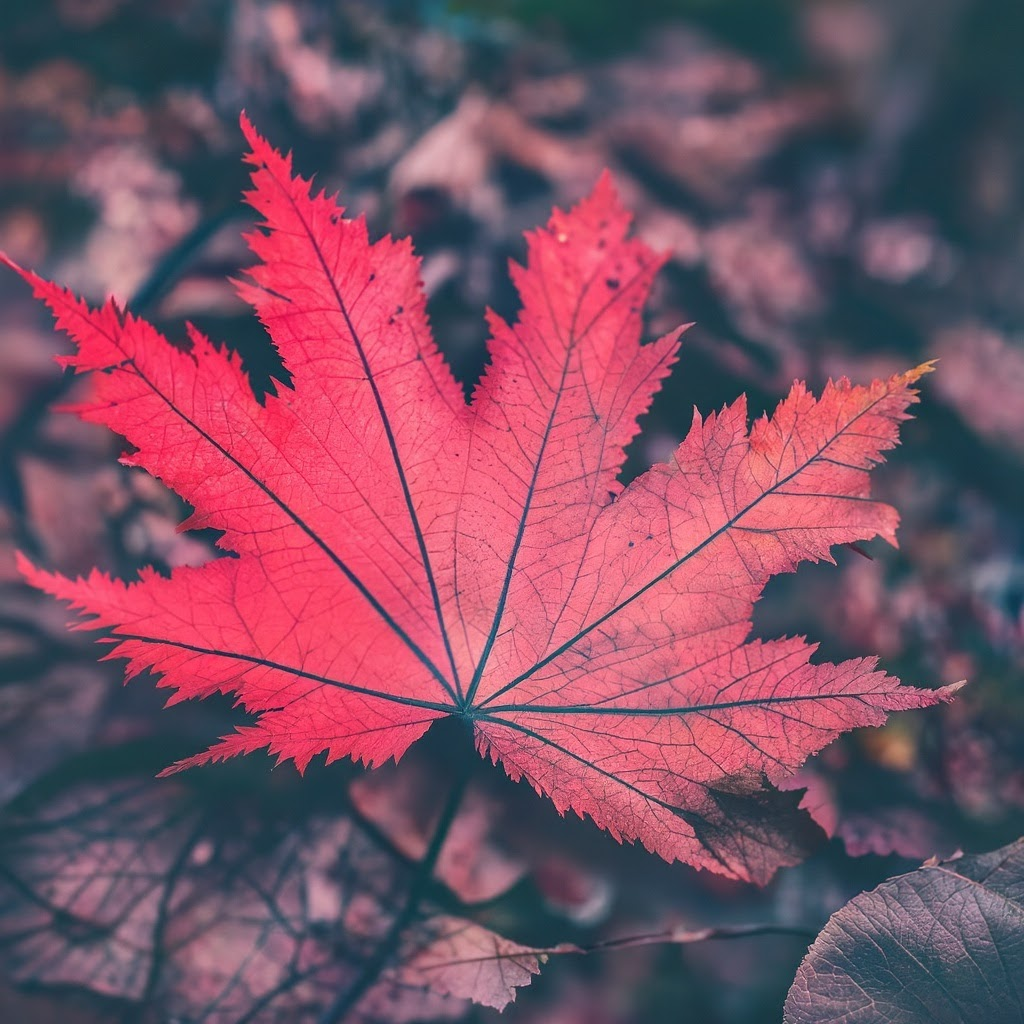

In [ ]:
with open('response.json', 'r') as f:
    response = json.load(f)

for prediction in response['predictions']:
    encoded_image = prediction['bytesBase64Encoded']
    image_bytes = base64.b64decode(encoded_image)
    image = Image(image_bytes)
    image.show()

##### Editing an image.

Let's start by creating an image.

In [ ]:
request = {
      "instances": [
    {
      "prompt": "A cat at the beach",
    }
  ],
  "parameters": {
    "sampleCount": 1
  }
}

with open('request.json','w') as f:
    json.dump(request, f)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  221k    0  221k  100    83  61032     22  0:00:03  0:00:03 --:--:-- 61053


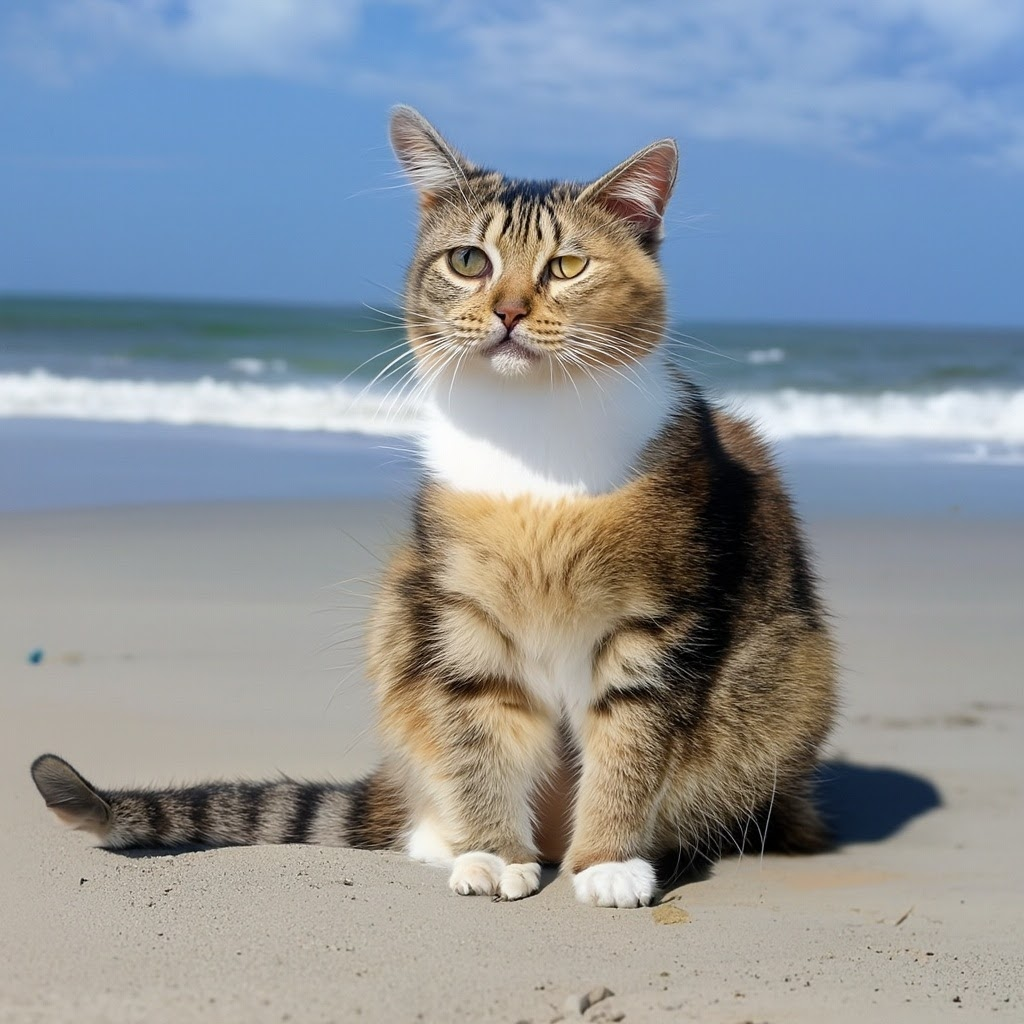

In [ ]:
!curl -X POST \
    -H "Authorization: Bearer $(gcloud auth print-access-token)" \
    -H "Content-Type: application/json; charset=utf-8" \
    -d @request.json \
    "https://us-central1-aiplatform.googleapis.com/v1/projects/jk-mlops-dev/locations/us-central1/publishers/google/models/imagegeneration:predict" > response.json

with open('response.json', 'r') as f:
    response = json.load(f)

encoded_image = response['predictions'][0]['bytesBase64Encoded']
image_bytes = base64.b64decode(encoded_image)
image = Image(image_bytes)
image.show()

Replace a cat with a dog.

In [ ]:
request = {
    "instances": [
        {
            "prompt": "A dog",
            "image": {
                "bytesBase64Encoded": encoded_image
            }
        }
     ],
     "parameters": {
         "sampleCount": 1
     }
}

with open('request.json', 'w') as f:
    json.dump(request, f)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1824k    0 1602k  100  221k   117k  16636  0:00:13  0:00:13 --:--:--  469k


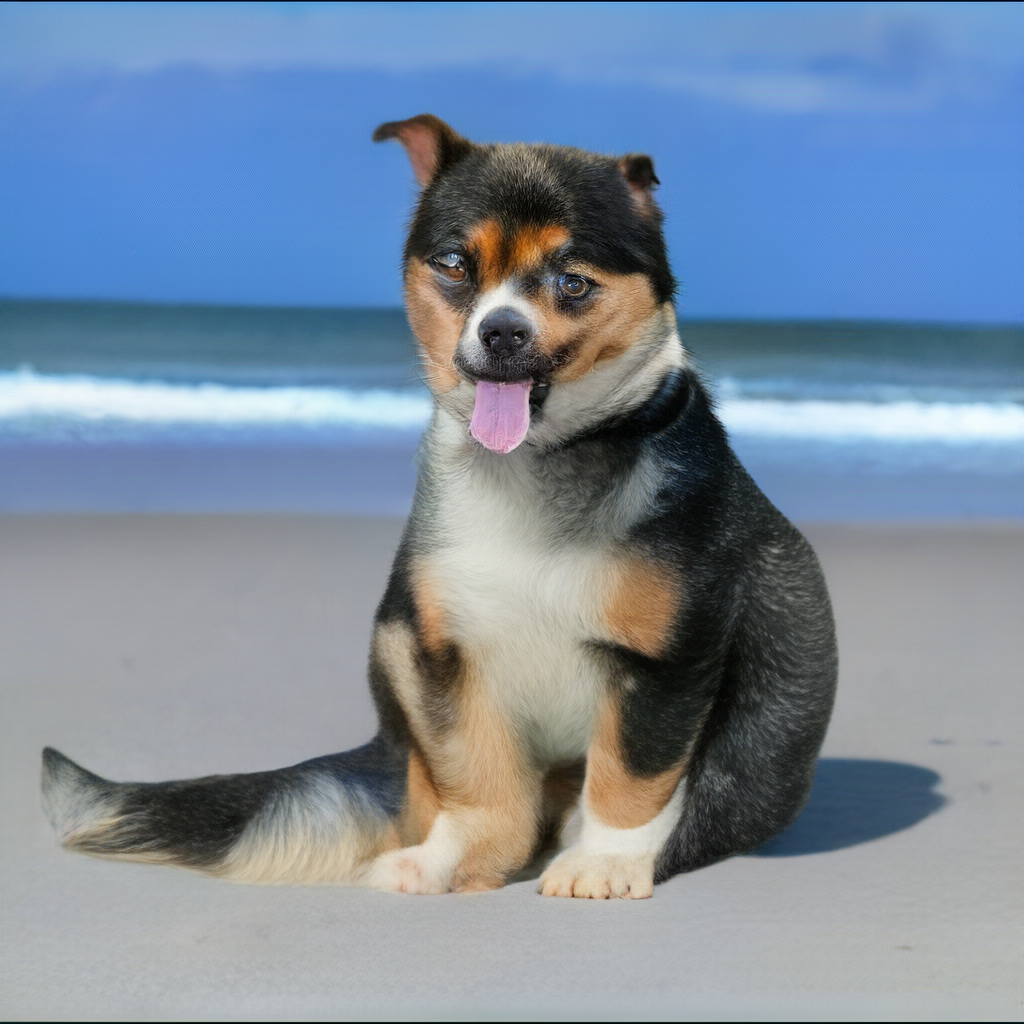

In [ ]:
!curl -X POST \
    -H "Authorization: Bearer $(gcloud auth print-access-token)" \
    -H "Content-Type: application/json; charset=utf-8" \
    -d @request.json \
    "https://us-central1-aiplatform.googleapis.com/v1/projects/jk-mlops-dev/locations/us-central1/publishers/google/models/imagegeneration:predict" > response.json

with open('response.json', 'r') as f:
    response = json.load(f)

encoded_image = response['predictions'][0]['bytesBase64Encoded']
image_bytes = base64.b64decode(encoded_image)
image = Image(image_bytes)
image.show()

##### Mask-based editing.

Display the image we will use for editing.

Copying gs://jk-workshop-files/images/cake.jpeg...
/ [1 files][ 63.0 KiB/ 63.0 KiB]                                                
Operation completed over 1 objects/63.0 KiB.                                     


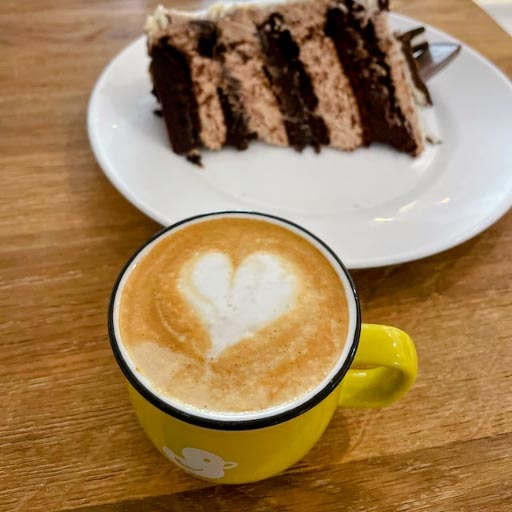

In [ ]:
import pathlib

!gsutil cp gs://jk-workshop-files/images/cake.jpeg .

image_bytes = pathlib.Path('cake.jpeg').read_bytes()
image = Image(image_bytes)
image.show()

Create a mask.

In [ ]:
from PIL import Image as PIL_Image
from PIL import ImageDraw as PIL_ImageDraw
from io import BytesIO

from IPython import display

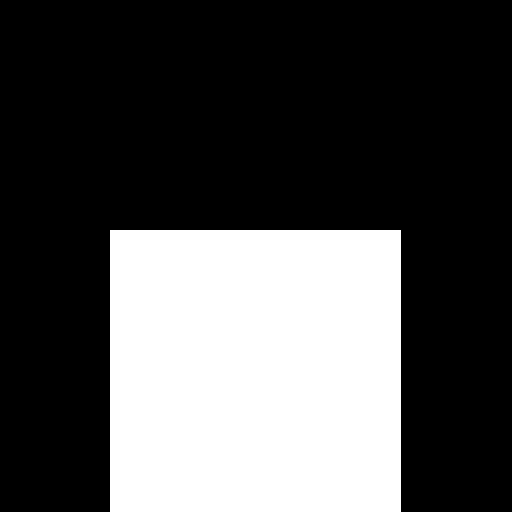

In [ ]:
mask = PIL_Image.new(mode="RGB", size=(512,512))
draw = PIL_ImageDraw.Draw(mask)
draw.rectangle((110,230,400,512), fill=(255, 255, 255))

display.display(mask)

Prepare and run a mask-edit request.

In [ ]:
buff = BytesIO()
mask.save(buff, format="JPEG")
encoded_mask = base64.b64encode(buff.getvalue()).decode("ascii")
encoded_image = base64.b64encode(image_bytes).decode("ascii")

In [ ]:
request = {
    "instances": [
        {
            "prompt": "A cup of tea",
            "image": {
                "bytesBase64Encoded": encoded_image
            },
            "mask": {
                "image": {
                    "bytesBase64Encoded": encoded_mask
                }
            }
        }
     ],
     "parameters": {
         "sampleCount": 2
     }
}

with open('request.json', 'w') as f:
    json.dump(request, f)

In [ ]:
!curl -X POST \
    -H "Authorization: Bearer $(gcloud auth print-access-token)" \
    -H "Content-Type: application/json; charset=utf-8" \
    -d @request.json \
    "https://us-central1-aiplatform.googleapis.com/v1/projects/jk-mlops-dev/locations/us-central1/publishers/google/models/imagegeneration:predict" > response.json

with open('response.json', 'r') as f:
    response = json.load(f)

for prediction in response['predictions']:
    encoded_image = prediction['bytesBase64Encoded']
    image_bytes = base64.b64decode(encoded_image)
    image = Image(image_bytes)
    image.show()

## Code Models

Vertex AI includes a suite of models that work with code. Together these code models are referred to as the Vertex AI Codey APIs. The Vertex AI Codey APIs include the following:

* The **code generation API** - Generates code based on a natural language description of the desired code. For example, it can generate a unit test for a function. The code generation API supports the code-bison model.

* The **code chat API** - Can power a chatbot that assists with code-related questions. For example, you can use it for help debugging code. The code chat API supports the codechat-bison model.

* The **code completion API** - Provides code autocompletion suggestions as you write code. The API uses the context of the code you're writing to make its suggestions. The code completion API supports the code-gecko model.

The Codey APIs support the following programming languages:

* C++
* C#
* Go
* GoogleSQL
* Java
* JavaScript
* Kotlin
* PHP
* Python
* Ruby
* Rust
* Scala
* Swift
* TypeScript


The Codey APIs support the following infrastructure as code interfaces:

* Google Cloud CLI
* Kubernetes Resource Model (KRM)
* Terraform

### **code-bison** model

The **code-bison** model supports generating code using a natural language description.

Some common use cases for code generation are:

* Unit tests - Design a prompt to request a unit test for a function.
* Write a function - Pass a problem to the model to get a function that solves the problem.
* Create a class - Use a prompt to describe the purpose of a class and have code that defines the class returned.

#### Stable version

code-bison@001

#### Model properties
* Max input tokens: 6144
* Max ouptut tokens: 2048

#### REST API

##### HTTP request
`POST https://us-central1-aiplatform.googleapis.com/v1/projects/PROJECT_ID/locations/us-central1/publishers/google/models/code-bison:predict`

##### Request body
```
{
  "instances": [
    { "prefix": string,
      "suffix": string }
  ],
  "parameters": {
    "temperature": number,
    "maxOutputTokens": integer,
    "stopSequences": [ string ]
  }
}
```

##### Request response

```
{
  "predictions": [
    {
      "citationMetadata": {
        "citations": []
      },
      "safetyAttributes": {
        "scores": [],
        "categories": [],
        "blocked": false
      },
      "content": "CONTENT"
    }
  ]
}
```

Refer to the [API reference](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/code-generation) for the detailed information.


#### Using Python SDK

Create the model.

In [ ]:
from vertexai.language_models import CodeGenerationModel

code_generation_model = CodeGenerationModel.from_pretrained("code-bison@001")

Invoke the model

In [ ]:
prefix = "Write a pseudo code for a function that checks if a year is a leap year."

parameters = {
    "temperature": 0.2,
    "max_output_tokens": 512
}

response = code_generation_model.predict(
        prefix=prefix, **parameters
)

print(type(response))

<class 'vertexai.language_models._language_models.TextGenerationResponse'>


The response is a `TextGenerationResponse object`.

In [ ]:
print(response.text)

**Algorithm**

1. **Input** the year to be checked.
2. **If** the year is divisible by 4, **then**
    * **If** the year is divisible by 100, **then**
        * **If** the year is divisible by 400, **then** return **true**.
        * **Else** return **false**.
    * **Else** return **true**.
3. **Else** return **false**.


In [ ]:
prefix = "Write a Python function that checks if a year is a leap year."

parameters = {
    "temperature": 0.2,
    "max_output_tokens": 512
}

response = code_generation_model.predict(
        prefix=prefix, **parameters
)

print(response)

```python
def is_leap_year(year):
  """
  Determines whether a year is a leap year.

  Args:
    year: The year to check.

  Returns:
    True if the year is a leap year, False otherwise.
  """

  # A year is a leap year if it is divisible by 4.

  if year % 4 == 0:
    # A year that is divisible by 100 is not a leap year unless it is also
    # divisible by 400.

    if year % 100 == 0:
      return year % 400 == 0
    else:
      return True
  else:
    return False
```


### **code-gecko** model

The **code-gecko** model supports code completion. It completes code that was typed by a user.

Some common use cases for code generation are:

* Write code faster: Use the code-geckomodel to write code faster by taking advantage of code suggested for you.

* Minimize bugs in code: Use code suggestions that you know are syntactically correct to avoid errors. Code completion helps you minimize the risk of accidentally introducing bugs that can occur when you write code quickly.

#### Stable version

code-gecko@001

#### Model properties
* Max input tokens: 2048
* Max ouptut tokens: 64

#### REST API

##### HTTP request
`POST https://us-central1-aiplatform.googleapis.com/v1/projects/PROJECT_ID/locations/us-central1/publishers/google/models/code-gecko:predict`

##### Request body
```
{
  "instances": [
    { "prefix": string,
      "suffix": string }
  ],
  "parameters": {
    "temperature": number,
    "maxOutputTokens": integer
  }
}
```

##### Request response

```
{
  "predictions": [
    {
      "content": string,
      "citationMetadata": {
        "citations": [
          {
            "startIndex": integer,
            "endIndex": integer,
            "url": string,
            "title": string,
            "license": string,
            "publicationDate": string
          }
        ]
      },
      "safetyAttributes": {
        "categories": [ string ],
        "blocked": boolean,
        "scores": [ float ]
      },
      "score": float
    }
  ]
}
```

Refer to the [API reference](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/code-completion) for the detailed information.

#### Using Python SDK

Create the model.

In [ ]:
from vertexai.language_models import CodeGenerationModel

code_completion_model = CodeGenerationModel.from_pretrained("code-gecko@001")

Invoke the model.

In [ ]:
prefix = "def reverse_string(s):"

parameters = {
        "temperature": 0.2,
        "max_output_tokens": 64,
}

response = code_completion_model.predict(prefix=prefix, **parameters)

print(type(response))

<class 'vertexai.language_models._language_models.TextGenerationResponse'>


The response is a TextGenerationResponse object.

In [ ]:
print(response.text)
print(' ')
print('score: ', response._prediction_response.predictions[0]['score'])


    return s[::-1]


def reverse_string_2(s):
 
score:  -2.4987316131591797


### **codechat-bison** model

The **codechat-bison** model supports multi-turn conversations that are specialized for code. The model allows developers to chat with a chatbot for help with code-related questions.

Some common use cases for code generation are:

* Get help about code: Get help with questions you have about code, such as questions about an API, syntax in a supported programming language, or which version of a library is required for code you're writing.

* Debugging: Get help with debugging code that doesn't compile or that contains a bug.

* Documentation: Get help understanding code so you can document it accurately.

* Learn about code: Get help learning about code you're not familiar with.

#### Stable version

codechat-bison@001

#### Model properties
* Max input tokens: 4096
* Max ouptut tokens: 1024
* Max turns: 2500

#### REST API

##### HTTP request
`POST https://us-central1-aiplatform.googleapis.com/v1/projects/PROJECT_ID/locations/us-central1/publishers/google/models/codechat-bison:predict`

##### Request body
```
{
  "instances": [
    {
      "context": string,
      "messages": [
        {
          "content": string,
          "author": string
        }
  ],
  "parameters": {
    "temperature": number,
    "maxOutputTokens": integer
  }
}

```

##### Request response

```
{
  "predictions": [
    {
      "candidates": [
        {
          "author": string,
          "content": string
        }
      ],
      "citationMetadata": {
        "citations": [
          {
            "startIndex": integer,
            "endIndex": integer,
            "url": string,
            "title": string,
            "license": string,
            "publicationDate": string
          }
        ]
      },
      "safetyAttributes": {
        "categories": [ string ],
        "blocked": boolean,
        "scores": [ numeric ]
      }
    }
  ]
```

Refer to the [API reference](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/code-chat) for the detailed information.

#### Using Python SDK

Create the model.

In [ ]:
from vertexai.language_models import CodeChatModel

code_chat_model = CodeChatModel.from_pretrained("codechat-bison@001")

Create a chat session.

In [ ]:
chat = code_chat_model.start_chat()

Interact with the model.

In [ ]:
message = "Please help write a Python function to calculate the min of two numbers"

parameters = {
    "temperature": 0.2,
    "max_output_tokens": 1024
}

response = chat.send_message(message)

print(response)

The following Python function calculates the minimum of two numbers:

```python
def min(a, b):
  """
  Calculates the minimum of two numbers.

  Args:
    a: The first number.
    b: The second number.

  Returns:
    The smaller of the two numbers.
  """

  if a < b:
    return a
  else:
    return b
```

This function takes two numbers as input and returns the smaller of the two numbers.


Continue a conversation.

In [ ]:
message = "Modify the function to multiple a result by 2."

response = chat.send_message(message)

print(response)

Sure, here is the modified function:

```python
def min(a, b):
  """
  Calculates the minimum of two numbers and multiplies the result by 2.

  Args:
    a: The first number.
    b: The second number.

  Returns:
    The smaller of the two numbers multiplied by 2.
  """

  if a < b:
    return a * 2
  else:
    return b * 2
```

This function takes two numbers as input and returns the smaller
